# Examples

The following examples shall help to understand what the package is able to accomplish and how you can use the interface yeoda offers to access and play around with your data.

## Setting up a data cube

A *yeoda* data cube augments existing data by integrating it into a data cube architecture similar to, e.g. Open Data Cube. To set up up such a data cube conveniently yeoda works in concert with [geopathfinder](https://github.com/TUW-GEO/geopathfinder) (file naming), [veranda](https://github.com/TUW-GEO/veranda) (IO classes) and [pytiletproj/Equi7Grid](https://github.com/TUW-GEO/Equi7Grid) (geo referencing).

First collect the files you want to put into your data-cube. You can use [geopathfinder](https://github.com/TUW-GEO/geopathfinder) conveniently gather files matching a certain file naming convention:

In [1]:
from geopathfinder.folder_naming import build_smarttree

root_path = "/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/"
folder_hierarchy = ["subgrid_name", "tile_name"]

# regex expressions are supported to select only files matching a certain pattern
# (i.e. not starting with Q ending with .tif)
tree = build_smarttree(root_path, folder_hierarchy, register_file_pattern="^[^Q].*.tif")
filepaths = tree.file_register

print(f"{len(filepaths)} files registered:")
print("\n".join(filepaths[:3]))
print("...")
print("\n".join(filepaths[-3:]))

36 files registered:
/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E050N015T1/D20160404_051758--_SIG0-----_S1AIWGRDH1VHD_095_A0105_EU010M_E050N015T1.tif
/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E050N015T1/D20160404_051758--_SIG0-----_S1AIWGRDH1VVD_095_A0105_EU010M_E050N015T1.tif
/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E050N015T1/D20160411_050947--_SIG0-----_S1AIWGRDH1VHD_022_A0105_EU010M_E050N015T1.tif
...
/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E050N015T1/D20160530_165827--_SIG0-----_S1AIWGRDH1VVA_044_A0105_EU010M_E050N015T1.tif
/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E050N015T1/D20160530_165852--_SIG0-----_S1AIWGRDH1VHA_044_A0105_EU010M_E050N015T1.tif
/data/yeoda/dwc_radar_ws/

You can use [pytiletproj/Equi7Grid](https://github.com/TUW-GEO/Equi7Grid) to define a grid to be used by the data cube.

In [2]:
from equi7grid.equi7grid import Equi7Grid

subgrid = Equi7Grid(10).EU

The file registry and grid can now be used directly as input to *yeoda's* `EODataCube` constructor, wrap a data cube structure around our data files.

In [3]:
from geopathfinder.naming_conventions.sgrt_naming import SgrtFilename
from src.yeoda.datacube import EODataCube

dimensions = ["var_name", "pol", "time", "orbit_direction", "relative_orbit", "tile_name"]
data_cube = EODataCube(filepaths=filepaths, dimensions=dimensions, filename_class=SgrtFilename, grid=subgrid,
                       sdim_name="tile_name", tdim_name="time")
data_cube.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile_name
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1


Now you're all setup and can perform data cube operations on your freshly minted data cube. This example showcases the most generic flavour of a data cube, however there are also more specialized data cube classes available which have been developed at the research group Remote Sensing of the GEO Department at TU Wien (TUWGEO).
For instance, to work with preprocessed data you can use the classes `SIG0DataCube` for sigma nought and `GMRDataCube` for radiometric terrain flattened gamma nought data. On the value-added data side, `SSMDataCube` allows you to access the TUWGEO SSM data.

In [4]:
from src.yeoda.products.preprocessed import SIG0DataCube

data_cube = SIG0DataCube(filepaths=filepaths, dimensions=dimensions, filename_class=SgrtFilename)
data_cube.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile_name
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1


*yeoda* uses a [GeoPandas](https://geopandas.org) dataframe to store the filename and geometry information internally.  On top of that, data cube functions where defined to filter, split, sort, align, etc. the data. It has to be noted that most functions have a keyword argument `inplace`, same as most [GeoPandas](https://geopandas.org) functions. In the next sections some example useages of these functions will be shown.

## Dimension operations

The following sections shows how you can manipulate the dimensions of the data cube itself, before doing any further operations based on them.

### Renaming dimensions

If you have to work with a pre-defined naming convention in geopathfinder (e.g. the SGRT naming convention) and if you do not agree with the naming of the filename parts/dimensions, you can still rename dimensions afterwards:

In [5]:
data_cube.rename_dimensions({'tile_name': 'tile'}, inplace=True)
data_cube.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1


### Adding dimensions

You can simply add new filepath-dependent values (e.g. file size, cloud coverage, …) along a new dimension (e.g. named “new_dimension”) with a few lines of code:

In [6]:
extended = data_cube.add_dimension("ones", [1] * len(data_cube))
extended.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile,ones
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1,1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1,1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1,1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1,1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1,1


## Sorting

One of the most common operations is to sort the inventory according to some metadata, e.g. the timestamp:

In [7]:
data_cube.sort_by_dimension('time', ascending=True, inplace=True)
data_cube.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1


## Filtering

Once you have your data cube structure setup you can also filter it before doing any processing, for instance, if you want to do some runtime intensive processing only on a small section of the data. The following sections give a few examples of the availble filtering methods. Again most methods provide a `inplace` flag, similar to [GeoPandas](https://geopandas.org).

### Filter by geometry

You can filter for arbitrary geometry or a list of bounding box coordinates. The filtered cube will only contain files within the specified geometry.

In [8]:
import osr

bbox = [(13.3290, 47.4096), (13.3859, 47.4586)]  # [(x_min, y_min), (x_max, y_max)]
sref = osr.SpatialReference()
sref.ImportFromEPSG(4326)  # LonLat spatial reference system


filtered_by_bbox = data_cube.filter_spatially_by_geom(bbox, sref=sref)

### Filter by dimension

A very important function is `filter_by_dimension`, which accepts a list of values and expressions to filter the data along a dimension. `expressions` is a list having the same length as values and includes mathematical comparison operators, i.e. “==”, “<=”, “>=”, “<”, “>” (“==” is default). Some examples are:

In [9]:
# only consider VV polarisation
only_vv = data_cube.filter_by_dimension(['VV'], name="pol")
only_vv.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-12 16:58:35,A,44,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-16 05:18:04,D,95,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-23 05:10:01,D,22,E050N015T1


In [10]:
from datetime import datetime

# only consider data between 2016-04-01 and 2016-05-01
time_span = [(datetime(2016, 4, 1), datetime(2016, 5, 1))]
time_span_only = data_cube.filter_by_dimension(time_span, [('>=', '<')], name='time')
time_span_only.inventory

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1
5,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-12 16:58:35,A,44,E050N015T1
6,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-16 05:18:04,D,95,E050N015T1
7,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-16 05:18:04,D,95,E050N015T1
8,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-23 05:10:01,D,22,E050N015T1
9,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-23 05:10:01,D,22,E050N015T1


### Filter by file pattern

You can also directly filter on the filename using a regex pattern:

In [11]:
filtered_by_pattern = data_cube.filter_files_with_pattern(".*044.*")
filtered_by_pattern.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-12 16:58:35,A,44,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-24 16:58:25,A,44,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-24 16:58:25,A,44,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-24 16:58:50,A,44,E050N015T1


### Filter by meta-data

If you have stored metadata attributes in you NetCDF or GeoTIFF files, you can also filter the data cube by certain attributes.

In [12]:
filtered_by_meta = data_cube.filter_by_metadata({'polarisation': 'VH'})
filtered_by_meta.inventory.head()

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-16 05:18:04,D,95,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-23 05:10:01,D,22,E050N015T1


## Splitting

You can use split operations to segregate your data cube into chunks which then in turn can be used for processing. For instance, you can perform a monthly split to calculate monthly means.

### Split by dimension

Split a data cube based on dimension values. The splitting conditions are expressed the same way as in `filter_by_dimension`.

In [13]:
values = ['VV', 'VH']
vv_cube, vh_cube = data_cube.split_by_dimension(values, name="pol")
print(f"parent cube of length {len(data_cube)}, split into two cubes of length {len(vv_cube)} and {len(vh_cube)}.")

parent cube of length 36, split into two cubes of length 18 and 18.


### Split monthly
If you want to analyse your data under certain temporal aspects, in this case in a monthly manner, you can split up the original data cube into smaller monthly data cubes (if the data covers more than a month):

In [14]:
months = data_cube.split_monthly()
print(f"parent data cube has been split into {len(months)} monthly cubes")

parent data cube has been split into 2 monthly cubes


Note, that *yeoda* also provides convenience functions for yearly splits.

## Joining

If you have multiple data cubes, or split them up to perform some processing, you can join them back together using join operations. The following section will look closer at a few of them.

### Intersection

You can use this operation to get only those fields of multiple data cubes with matching dimensions or with a specific matching dimension:

In [15]:
only_april_remains = data_cube.intersect(months[0], on_dimension='time')
only_april_remains.inventory

,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-11 05:09:47,D,22,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-11 05:09:47,D,22,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-12 16:58:35,A,44,E050N015T1
5,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-12 16:58:35,A,44,E050N015T1
6,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-16 05:18:04,D,95,E050N015T1
7,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-16 05:18:04,D,95,E050N015T1
8,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-23 05:10:01,D,22,E050N015T1
9,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-23 05:10:01,D,22,E050N015T1


### Union
If you have two data cubes and you want to unite their information, you can simply do:

In [16]:
april_and_may = months[0].unite(months[1])
print(f"back to {len(april_and_may.inventory)} items")

back to 36 items


### Alignment

Another very import set operation is the align_dimension method. It allows to align a data cube with respect to a second data cube along a dimension (name). In other words, the order and the length of the dimension will then be the same. This also means that data cube entries are duplicated if they appear more often in the second data cube.

In [17]:
# create a small test data cube
small = data_cube.filter_by_dimension(datetime(2016, 4, 4, 5, 17, 58), name='time')
print(f"small data cube of lenghth {len(small)}")
# align the 'pol' dimension with the large data cube
aligned_with_duplicates = small.align_dimension(only_april_remains, 'pol')
aligned_with_duplicates.inventory

small data cube of lenghth 2


,filepath,var_name,pol,time,orbit_direction,relative_orbit,tile
0,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
1,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
2,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
3,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
4,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
5,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
6,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
7,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1
8,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VH,2016-04-04 05:17:58,D,95,E050N015T1
9,/data/yeoda/dwc_radar_ws/data/Sentinel-1_CSAR/...,SIG0,VV,2016-04-04 05:17:58,D,95,E050N015T1


## Loading Data

This section is dedicated on loading the data. All functions have a common set of keyword arguments, where the most important ones are discussed here:

 - band: This argument specifies the band name as a string.
 - dtype: There are many different types of Python data structure to store array-like data and their selection mainly depends on what you want to do with the loaded data later on. yeoda offers to use three of them:
   - xarray.DataSet (“xarray”)
   - numpy.ndarray (“numpy”)
   - pandas.DataFrame (“dataframe”)
 - origin: Depending on the chosen return data type, origin defines the origin of the pixel coordinates in the world system. The origin can be one of the following:
   - upper left (“ul”)
   - upper right (“ur”, default)
   - lower right (“lr”)
   - lower left (“ll”)
   - center ("c")

### Load by geometry

You can also load data for a region defined by an arbitrary geometry, similar to how you can filter by geometry. Geometries do not need to be axis-parallel, so additional data has to be loaded to follow an array-like structure. If one is not interested in values outside the region of interest, it is possible to set the keyword parameter apply_mask to true.

/home/braml/miniconda3/envs/yeoda/lib/python3.7/site-packages/geospade/crs.py:527: UserWarning: Conversion from 'PROJ4' to 'EPSG' is not possible.
  warnings.warn(warn_msg.format(self._sref_type.upper(), tar_sref_type.upper()))


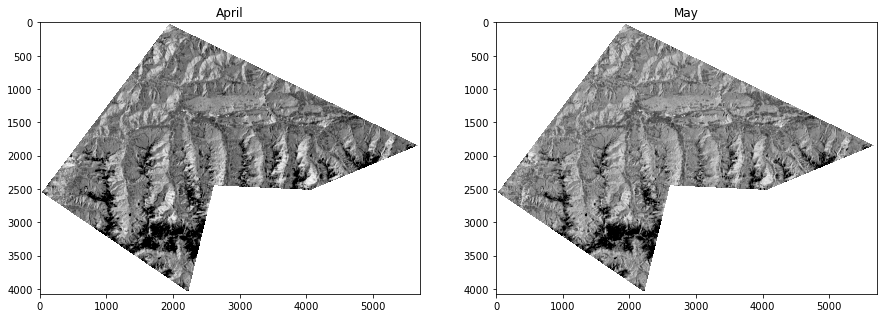

In [18]:
import matplotlib.pyplot as plt


polygon = [(13.1480, 47.2480), (13.3526, 47.5002), (13.8817, 47.3838),
           (13.6789, 47.3027), (13.4884, 47.2904), (13.4673, 47.1422)]
months_vv = [m.filter_by_dimension(['VV'], name="pol") for m in months]
months_ar = [m.load_by_geom(polygon, sref=sref, apply_mask=True) for m in months]

# the '1' indices the 1-band in our backscatter geo-tif
monthly_means = [ma['1'].mean(axis=0) for ma in months_ar]

_, axs = plt.subplots(1, len(monthly_means), figsize=(15, 5))
plt.title("Polygon cutout of sig0 monthly means")
for mm, ax, title in zip(monthly_means, axs, ["April", "May"]):
    ax.set_title(title)
    ax.imshow(mm, cmap=plt.cm.Greys_r, vmax=-50, vmin=-200)

The `months_ar` list contains [xarrays](https://docs.xarray.dev/en/stable/) with a data variable “1” and three dimensions time, x, y, where all spatial coordinates refer to the center pixel origin. You can perform do any xarray operations on it, e.g. mean to calculate monthly means. The actual data is stored as a [masked numpy array](https://numpy.org/doc/stable/reference/maskedarray.generic.html). It still contains all information, but has a mask allowing to mask pixels outside the geometry.

### Load by coordinates

The `load_by_coords`, accepts a list of x and a list of y (world system) coordinates as input. If the spatial reference of the coordinates is not equal to the data, you need to specify the spatial reference keyword argument `sref`.

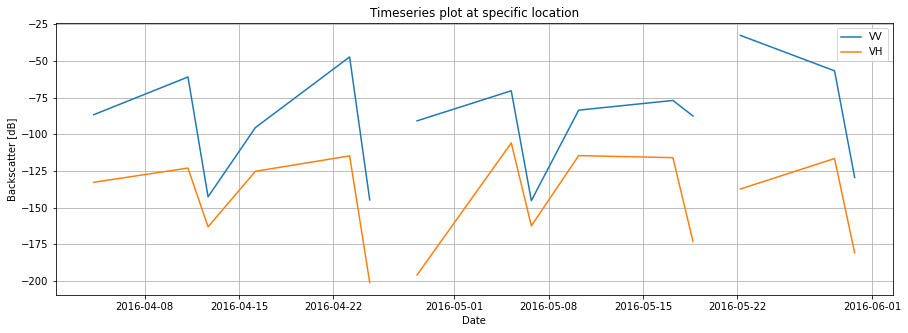

In [19]:
import ogr

# defining a point to sample a time series from
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(13.4884, 47.2904)
point.AssignSpatialReference(sref)

# filtering data cube
data_around_point = data_cube.filter_spatially_by_geom(point)

# split data cube into two polarisations
dc_vv, dc_vh = data_around_point.split_by_dimension(['VV', 'VH'], name='pol')

# load data by coordinates
data_vv = dc_vv.load_by_coords(point.GetX(), point.GetY(), sref=sref, dtype="numpy")
data_vh = dc_vh.load_by_coords(point.GetX(), point.GetY(), sref=sref, dtype="numpy")

# prepare a nice plot
plt.figure(figsize=(15, 5))
plt.title('Timeseries plot at specific location')
plt.plot(dc_vv['time'], data_vv.flatten(), label="VV")
plt.plot(dc_vh['time'], data_vh.flatten(), label="VH")
plt.xlabel('Date')
plt.ylabel('Backscatter [dB]')
plt.legend()
plt.grid()
plt.show()

By specifying the `dtype` to be "numpy" parameter of the loading function, we request a plain numpy array instead of the default xarray.

### Load by pixels

`load_by_pixels` expects pixel coordinates given by a list of row and column indexes. The keyword arguments row_size and col_size allow you to define a window, where the specified ranges count from left to right (columns) and from top to bottom (rows) starting at the given row and column coordinates.

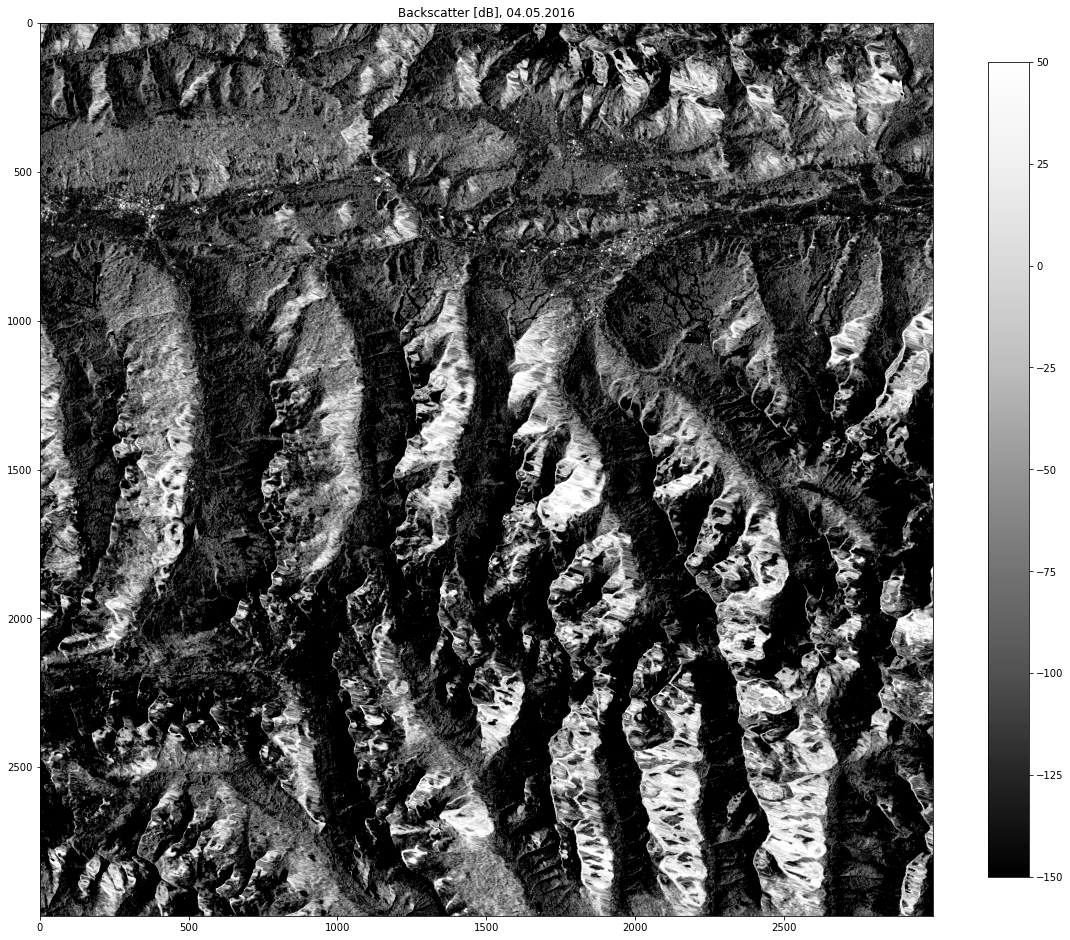

In [20]:
# filter data cube for one day
single_day = dc_vv.filter_by_dimension(datetime(2016, 4, 4, 5, 17, 58), name="time")

pixels = single_day.load_by_pixels(4000, 4000, row_size=3000, col_size=3000, dtype="numpy")

# plot the data
plt.figure(figsize=(20, 20))
plt.title('Backscatter [dB], 04.05.2016')
img_h = plt.imshow(pixels[0, ...], cmap=plt.get_cmap("Greys_r"), vmin=-150, vmax=50)
cb = plt.colorbar(img_h, shrink=0.75)
plt.show()